In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from torch.nn import Softplus #smooth relu
import torch.nn as nn
import torch.nn.functional as F
from utils import generate_polynomial_data
import numpy as np
import torch
import torch.optim as optim
from torch.nn import MSELoss
import pickle
from tqdm import tqdm

from model import Net, check_loss_landscape

import matplotlib.pyplot as plt

/afs/csail.mit.edu/u/m/melango/.conda/envs/p3t14/lib/python3.6/site-packages/torch/nn/_reduction.py:43: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))


In [5]:
torch.manual_seed(0)
suffix = "9"

n = 300
d = 5000
generate_data = True
usepickle = True

coeffs = -1+2*np.random.rand(d, 1)
xvals = -1+2*np.random.rand(n)
fileend = ".pickle" if usepickle else ".npy"

if generate_data:
    print("Generating Data...")
    X, Y = generate_polynomial_data(coeffs, xvals)
    with open("./datasets/X%s%s" %(("pickle_" if usepickle else ""), suffix)+fileend, "wb") as f:
        if usepickle:
            pickle.dump(X, f)
        else:
            np.save(f, X)
    with open("./datasets/Y%s%s" %(("pickle_" if usepickle else ""),suffix) + fileend, "wb") as f:
        if usepickle:
            pickle.dump(Y, f)
        else:
            np.save(f, Y)
    with open("./datasets/coeffs%s%s" %(("pickle_" if usepickle else ""),suffix) + fileend, "wb") as f:
        if usepickle:
            pickle.dump(coeffs, f)
        else:
            np.save(f, coeffs)
    
else:
    with open("./datasets/X%s%s" %(("pickle_" if usepickle else ""),suffix) + fileend, "rb") as f:
        if usepickle:
            X = pickle.load(f)
        else:
            X = np.load(f)
    with open("./datasets/Y%s%s" %(("pickle_" if usepickle else ""),suffix) + fileend, "rb") as f:
        if usepickle:
            Y = pickle.load(f)
        else:
            Y = np.load(f)
    with open("./datasets/coeffs%s%s" %(("pickle_" if usepickle else ""),suffix) + fileend, "rb") as f:
        if usepickle:
            coeffs = pickle.load(f)
        else:
            coeffs = np.load(f)

  4%|▎         | 11/300 [00:00<00:02, 101.41it/s]

Generating Data...


100%|██████████| 300/300 [00:03<00:00, 94.63it/s]


  0%|          | 0/2000 [00:00<?, ?it/s]

Running on GPU
Running on GPU


  2%|▏         | 33/2000 [00:00<00:06, 327.50it/s]

Epoch 1 iteration 2000 loss: 5.23


  1%|          | 22/2000 [00:00<00:09, 211.01it/s]

Epoch 2 iteration 2000 loss: 2.06


  2%|▏         | 33/2000 [00:00<00:06, 327.55it/s]

Epoch 3 iteration 2000 loss: 1.03


  2%|▏         | 38/2000 [00:00<00:05, 371.25it/s]

Epoch 4 iteration 2000 loss: 0.39


  2%|▏         | 31/2000 [00:00<00:06, 308.07it/s]

Epoch 5 iteration 2000 loss: 0.04


  2%|▏         | 41/2000 [00:00<00:04, 401.90it/s]

Epoch 6 iteration 2000 loss: 0.02


  2%|▏         | 43/2000 [00:00<00:04, 426.14it/s]

Epoch 7 iteration 2000 loss: 0.02


  2%|▏         | 38/2000 [00:00<00:05, 370.37it/s]

Epoch 8 iteration 2000 loss: 0.02


  1%|          | 22/2000 [00:00<00:09, 219.32it/s]

Epoch 9 iteration 2000 loss: 0.01


  1%|▏         | 28/2000 [00:00<00:07, 276.80it/s]

Epoch 10 iteration 2000 loss: 0.01


  2%|▏         | 43/2000 [00:00<00:04, 426.65it/s]

Epoch 11 iteration 2000 loss: 0.01


  2%|▏         | 37/2000 [00:00<00:05, 361.93it/s]

Epoch 12 iteration 2000 loss: 0.01


  2%|▏         | 43/2000 [00:00<00:04, 422.87it/s]

Epoch 13 iteration 2000 loss: 0.01


  2%|▏         | 44/2000 [00:00<00:04, 434.87it/s]

Epoch 14 iteration 2000 loss: 0.01


  2%|▏         | 46/2000 [00:00<00:04, 455.53it/s]

Epoch 15 iteration 2000 loss: 0.01


  2%|▏         | 42/2000 [00:00<00:04, 417.94it/s]

Epoch 16 iteration 2000 loss: 0.01


  2%|▏         | 37/2000 [00:00<00:05, 363.10it/s]

Epoch 17 iteration 2000 loss: 0.01


  2%|▏         | 44/2000 [00:00<00:04, 433.59it/s]

Epoch 18 iteration 2000 loss: 0.0


  2%|▏         | 36/2000 [00:00<00:05, 354.46it/s]

Epoch 19 iteration 2000 loss: 0.0


100%|██████████| 2000/2000 [00:05<00:00, 356.33it/s]


Epoch 20 iteration 2000 loss: 0.0
[5.227856992006302, 2.0607475106716158, 1.0287315960526466, 0.3862510462589562, 0.04128611077368259, 0.021043691992759704, 0.01774721889384091, 0.015262299592141062, 0.013294328236021101, 0.01168812222359702, 0.010347094014286995, 0.00920917289890349, 0.008232861279509961, 0.007389126948313788, 0.006656601544469595, 0.006018849401501939, 0.005462681406410411, 0.0049771928014233704, 0.004553180034272373, 0.004182718930765986]


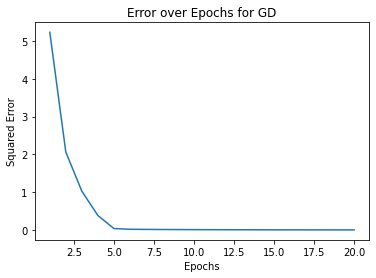

In [6]:
torch.manual_seed(0)

sgd = False
train = True

if sgd:
    model_path = "./models/model_sgd_%s.pt"%suffix
    net = Net(d, epochs = 50)
else:
    model_path = "./models/model_sgd_%s_O100_params.pt"%suffix
    net = Net(d, epochs = 20)
    
if train:
    if torch.cuda.is_available():
        device = torch.device("cuda:0")
        print("Running on GPU")
    net.to(device)
    if sgd:
        net.train_sgd(X, Y, 100000, lr = 1e-2)
    else:
        net.train_gd(X, Y, 2000, lr = 1e-3)
    torch.save(net.state_dict(), model_path)

In [ ]:
check_loss_landscape(model_path, X, Y, sgd=False)

# old

In [ ]:
net = Net(d, epochs = 20)

In [ ]:
device = next(net.parameters()).device

In [ ]:
X_cuda = torch.from_numpy(X).to(device)
Y_cuda = torch.from_numpy(Y).to(device)

In [ ]:
net.train_gd(X, Y, T=2000, lr=1e-03)

In [ ]:
model_path = "./models/model_%s.pt"%suffix
torch.save(net.state_dict(), model_path)

In [ ]:
check_loss_landscape(model_path, X, Y)